# References

[Install Imbalanced Learn](https://imbalanced-learn.readthedocs.io/en/stable/install.html)

[Install XGBoost](https://gist.github.com/faizanahemad/623dd0dbe376fff85359ca9ff5317c5b)

`pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master`

`pip install keras`

`pip install tensorflow`

`pip install missingno`

[Install IpyWidgets for Interactive Simulation](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)

[Using Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)


[Plotly Installation](https://plot.ly/python/getting-started/)





[XGBoost validation plots](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)

# Motivation
Why would we want to generate data?

Three Reasons 
- to check the behaviour of Algorithms like Classifiers and Clustering algos
- to understand and visualize how different data distributions look like?
    - Noise Levels
    - Imbalance
- What are the optimal ways to proceed for various data distributions

# Imports and Libs

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
from pandas import DataFrame
import more_itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

from multiprocessing import Pool
from xgboost import XGBClassifier
import multiprocessing

pd.options.display.max_rows=900
pd.options.display.max_columns=900

%matplotlib inline
import seaborn as sns
from IPython.display import display

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils import plots as plot_utils
from data_science_utils.dataframe import column as column_utils
from data_science_utils import misc as misc
from data_science_utils import preprocessing as pp_utils

import warnings
import traceback
np.set_printoptions(threshold=np.nan)
warnings.filterwarnings('ignore')
import sys, os
import missingno as msno
import random
import gc

pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
import pixiedust


[nltk_data] Downloading package punkt to /Users/ahemf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahemf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ahemf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ahemf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /Users/ahemf/nltk_data...
[nltk_data]   Package omw is already up-to-date!
Using TensorFlow backend.


Pixiedust database opened successfully


In [2]:
import sys, os

sys.path.append(os.getcwd())

import os.path
import sys
from inspect import getsourcefile

current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = current_dir[:current_dir.rfind(os.path.sep)]

sys.path.insert(0, current_dir)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB



In [4]:
from lib import *
import pixiedust

In [5]:
import plotly
plotly.__version__
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


'3.7.0'

# Generating Data using Standard Scikit Functions

Scikit has datasets module while helps generate data of your preference.

Few important data generators are shown with usage below.


## Gaussian Quantiles [N-D supported]

Generates Gaussian distribution data.

`n_features` will get you more dimensions


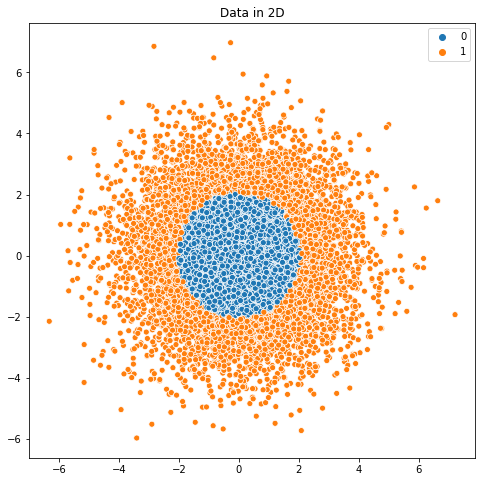

Text(0.5, 0, '1st Dim')

Text(0.5, 0, '2nd Dim')

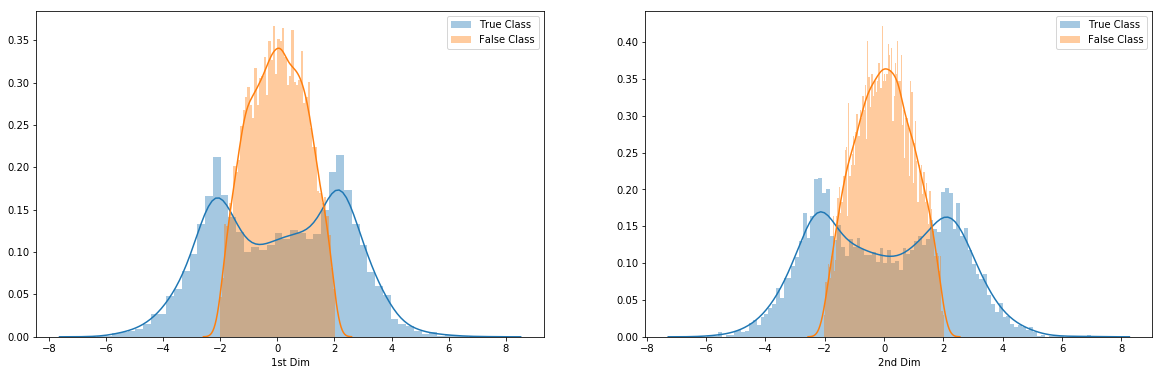

In [17]:
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)

X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
visualize_2d(X1,y1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.distplot(X1[y1==1]['x'],bins=50,label="True Class",ax=ax1)
sns.distplot(X1[y1==0]['x'],bins=50,label="False Class",ax=ax1)
ax1.set_xlabel("1st Dim")
ax1.legend()

sns.distplot(X1[y1==1]['y'],bins=100,label="True Class",ax=ax2)
sns.distplot(X1[y1==0]['y'],bins=100,label="False Class",ax=ax2)
ax2.set_xlabel("2nd Dim")
ax2.legend()
plt.show()




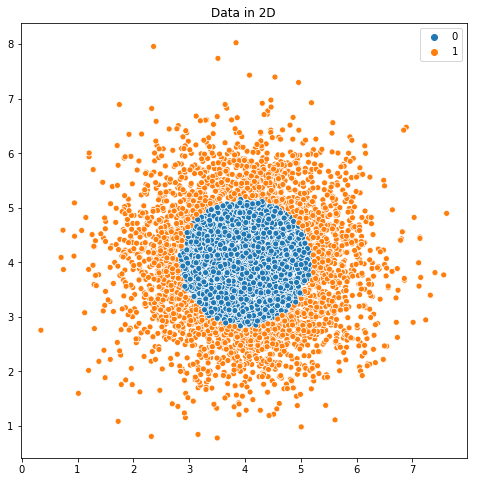

Text(0.5, 0, '1st Dim')

Text(0.5, 0, '2nd Dim')

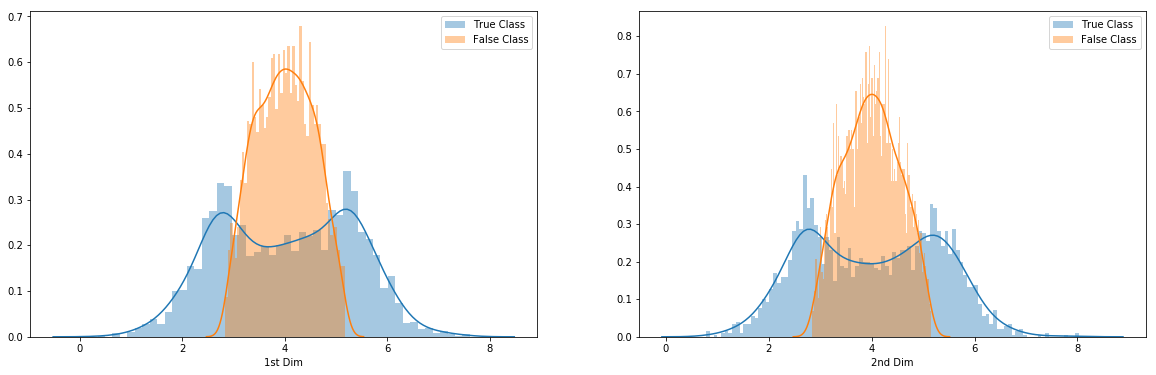

In [18]:
X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=5000, n_features=2,
                                 n_classes=2, random_state=1)

X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)
visualize_2d(X2,y2)


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.distplot(X2[y2==1]['x'],bins=50,label="True Class",ax=ax1)
sns.distplot(X2[y2==0]['x'],bins=50,label="False Class",ax=ax1)
ax1.set_xlabel("1st Dim")
ax1.legend()

sns.distplot(X2[y2==1]['y'],bins=100,label="True Class",ax=ax2)
sns.distplot(X2[y2==0]['y'],bins=100,label="False Class",ax=ax2)
ax2.set_xlabel("2nd Dim")
ax2.legend()
plt.show()


(10000, 2)

(5000, 2)

(15000, 2)

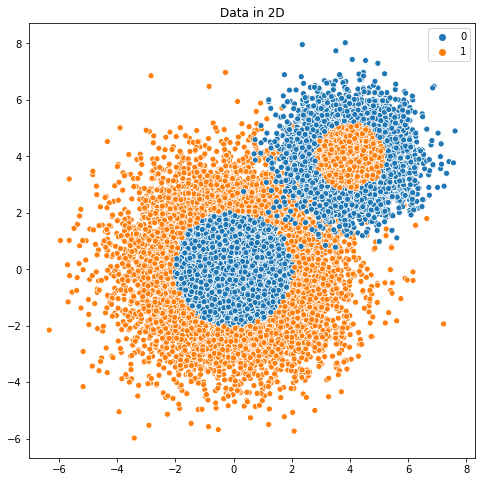

In [20]:
X1.shape
X2.shape

X = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))
X.shape

visualize_2d(X,y)

### 3 Class Gaussian

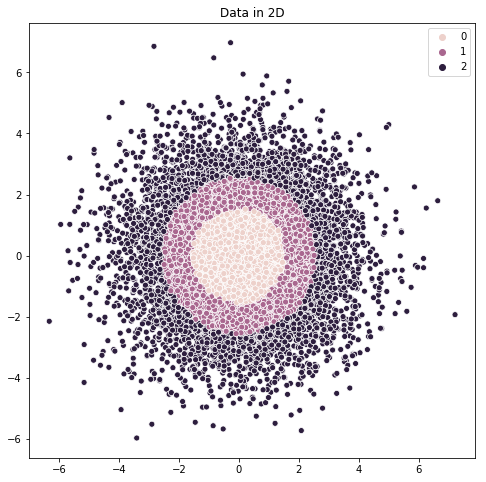

In [9]:
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=3, random_state=1)

X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
visualize_2d(X1,y1)

### 3D Gaussian with 3 features

In [ ]:
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=10000, n_features=3,
                                 n_classes=2, random_state=1)

X1 = pd.DataFrame(X1,columns=['x','y','z'])
y1 = pd.Series(y1)
visualize_3d(X1,y1)

Notice the Gaussian distribution centered at 0, and having false labels near zero and true labels far from zero.

We just used the mean parameter to shift the distribution to (4,4) in 2D. 

Now we will combine the two distributions to make a complex distribution

Notice how this distribution is complex for a classifier now given that it has 4 circular decision boundaries.


## Making Guassian 3D data

In [ ]:
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=1000, n_features=3,
                                 n_classes=2, random_state=1)


X2, y2 = make_gaussian_quantiles(mean=(5,5,5), cov=1,
                                 n_samples=1000, n_features=3,
                                 n_classes=2, random_state=1)



X = pd.DataFrame(np.concatenate((X1, X2)),columns=['x','y','z'])
y = pd.Series(np.concatenate((y1, - y2 + 1)))

visualize_3d(X,y)

## Making Moons [2D only]

This is another data generator which gives 2D data of moon shapes

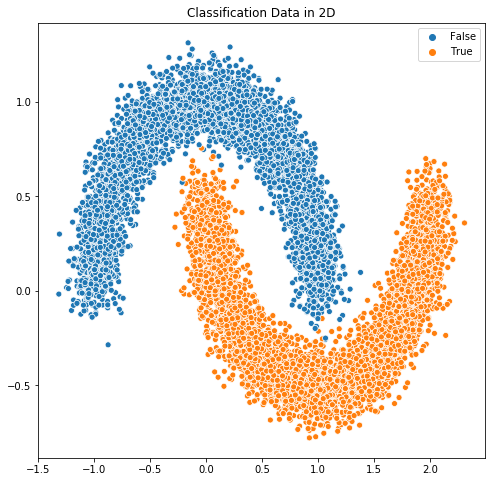

In [374]:
# Moons
from sklearn.datasets import make_moons

X,y = make_moons(10000,noise=0.1)
X = pd.DataFrame(X,columns=['x','y'])
y = pd.Series(y)

visualize_2d(X,y)

## Blobs [N-D Supported]



In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=10000, centers=4, n_features=3,random_state=17)

X = pd.DataFrame(X)
y = pd.Series(y)


visualize_3d(X,y)

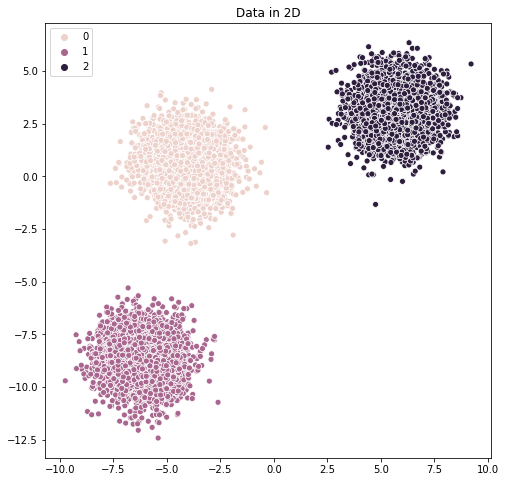

In [25]:
X,y = make_blobs(n_samples=10000, centers=3, n_features=2,random_state=17)

X = pd.DataFrame(X,columns=['x','y'])
y = pd.Series(y)


visualize_2d(X,y)

## Make Classification API

### 3 Class 3D

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=3, n_informative=3, 
                    n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=2,
                          class_sep=1.5,
                   flip_y=0,weights=[0.5,0.5,0.5])

X = pd.DataFrame(X)
y = pd.Series(y)

visualize_3d(X,y)



### 3 Class 2D with noise

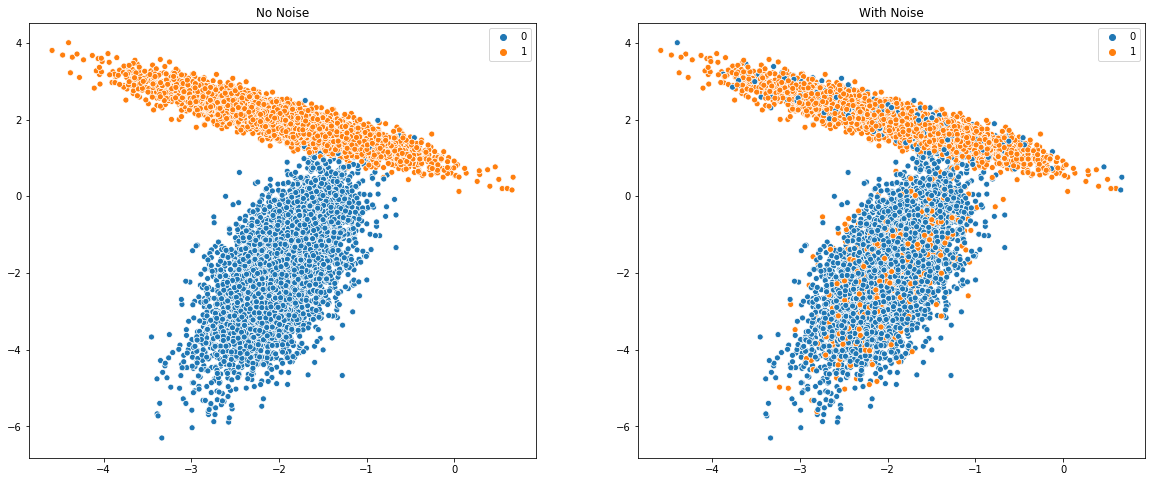

In [38]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)



f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");

X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=2,
                   flip_y=0.2,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("With Noise");

plt.show();



### Imbalance

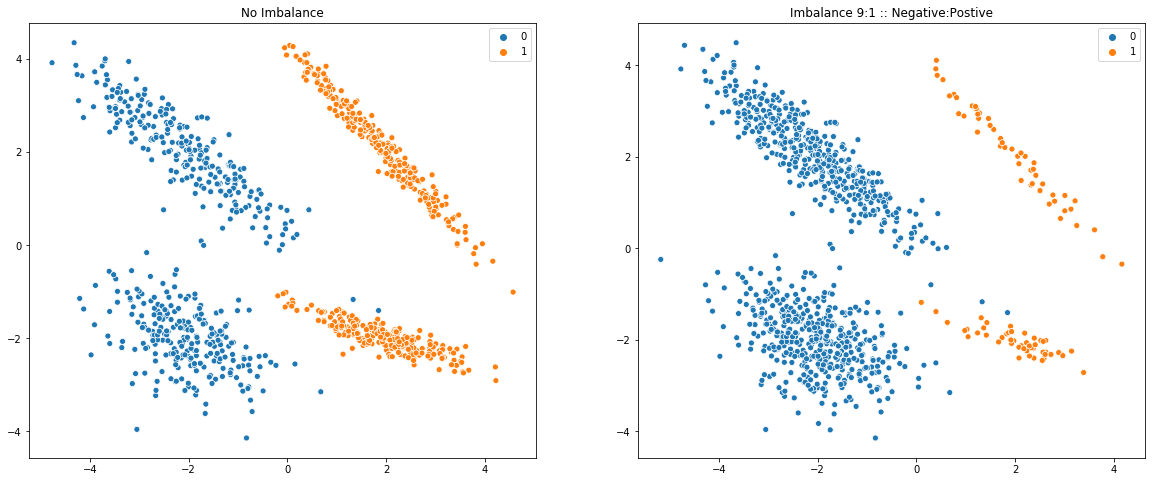

In [44]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)



f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Imbalance");

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.9,0.1], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Imbalance 9:1 :: Negative:Postive");

plt.show();


### Redundant features

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=3, n_informative=3, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_3d(X,y,algorithm="pca")


X,y = make_classification(n_samples=10000, n_features=3, n_informative=2, 
                    n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_3d(X,y,algorithm="pca")


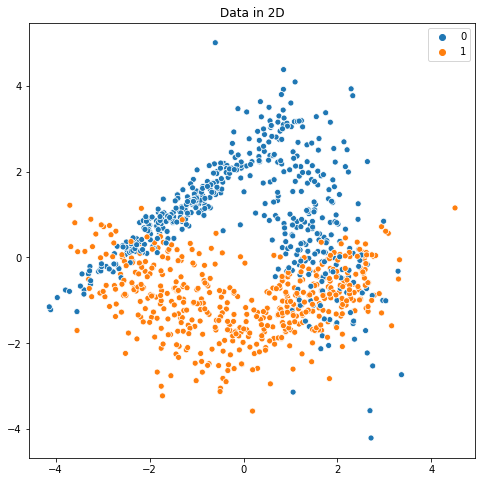

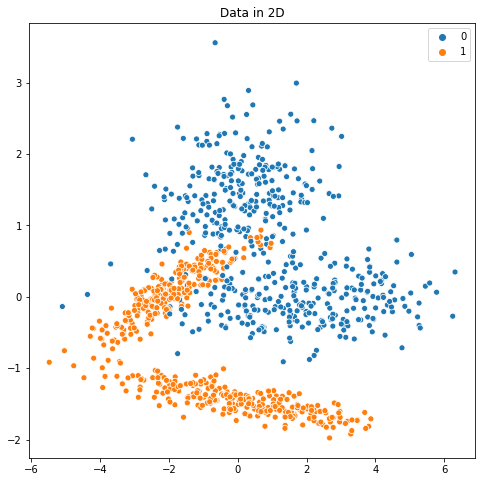

In [18]:


X,y = make_classification(n_samples=1000, n_features=3, n_informative=3, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_2d(X,y,algorithm="pca")


X,y = make_classification(n_samples=1000, n_features=3, n_informative=2, 
                    n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_2d(X,y,algorithm="pca")

### Using Repeated Features

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=3, n_informative=3, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_3d(X,y,algorithm="pca")


X,y = make_classification(n_samples=10000, n_features=3, n_informative=2, 
                    n_redundant=0, n_repeated=1, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)

visualize_3d(X,y,algorithm="pca")

### Using class separation

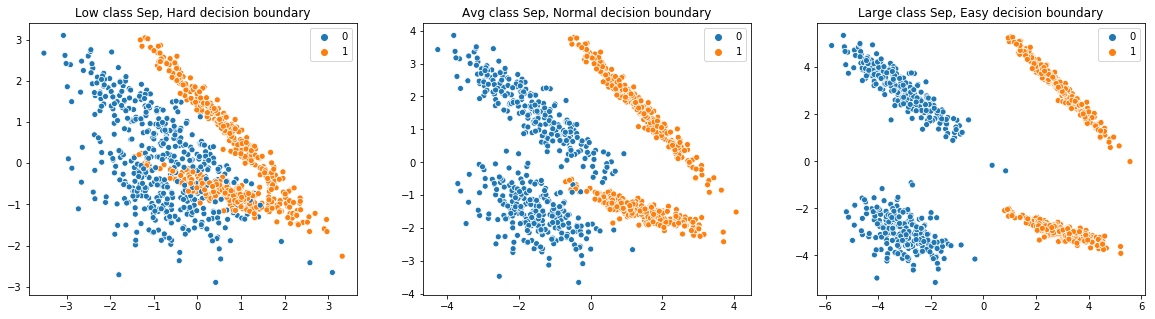

In [23]:
from sklearn.datasets import make_classification

# Low class Sep, Hard decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=0.75,
                   flip_y=0,weights=[0.5,0.5], random_state=17)



f, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Low class Sep, Hard decision boundary");

# Avg class Sep, Normal decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1.5,
                   flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Avg class Sep, Normal decision boundary");


# Large class Sep, Easy decision boundary

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=3,
                   flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax3);
ax3.set_title("Large class Sep, Easy decision boundary");


plt.show();



# Using your data to check Classifier characteristics

Lets try three classifiers.

- Logistic Regression
- Logistic Regression with polynomial features
- XGBoost Classifier.

In [91]:
def run_logistic_plain(X,y,ax):
    classifier = make_pipeline(StandardScaler(), LogisticRegression())
    X_train, X_test, y_train, y_test = split(X,y)
    results = run_classifier(classifier,[balanced_accuracy_scorer],X_train, y_train, X_test, y_test, plot=False,plot_data=False,)
    res = results[balanced_accuracy_scorer.__name__][1]
    plot_decision_boundary_2d(X,classifier,ax,"LogisticRegression: %.4f"%(res))
    return results

def run_logistic_polynomial_features(X,y,ax):
    classifier = make_pipeline(PolynomialFeatures(),StandardScaler(), LogisticRegression())
    X_train, X_test, y_train, y_test = split(X,y)
    results = run_classifier(classifier,[balanced_accuracy_scorer],X_train, y_train, X_test, y_test, plot=False,plot_data=False,)
    res = results[balanced_accuracy_scorer.__name__][1]
    plot_decision_boundary_2d(X,classifier,ax,"LogisticRegression with PolynomialFeatures: %.4f"%(res))
    return results

def run_xgb(X,y,ax):
    classifier = XGBClassifier()
    X_train, X_test, y_train, y_test = split(X,y)
    results = run_classifier(classifier,[balanced_accuracy_scorer],X_train, y_train, X_test, y_test, plot=False,plot_data=False,)
    res = results[balanced_accuracy_scorer.__name__][1]
    plot_decision_boundary_2d(X,classifier,ax,"XGBoost Regression: %.4f"%(res))
    return results

def plot_decision_boundary_2d(X,classifier,ax=None,title="Decision Boundary"):
    if X.shape[1]!=2:
        raise ValueError("Decision Boundary Plotting only works in 2D")
    xmin,ymin = X.min() - 1
    xmax,ymax = X.max() + 1
    x_values = np.arange(xmin,xmax,(xmax-xmin)/100)
    y_values = np.arange(ymin,ymax,(ymax-ymin)/100)
    x_y_values = []
    for x_value in x_values:
        for y_value in y_values:
            x_y_values.append([x_value,y_value])
    X = pd.DataFrame(x_y_values,columns=X.columns)
    y = classifier.predict(X)
    y = [True if yi else False for yi in y]
    if ax is None:
        f, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
    
    X = X.values
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Dim 1 (X)")
    ax.set_ylabel("Dim 2 (Y)")
    



Text(0.5, 1.0, 'Easy decision boundary')

Text(0.5, 1.0, 'Hard decision boundary')

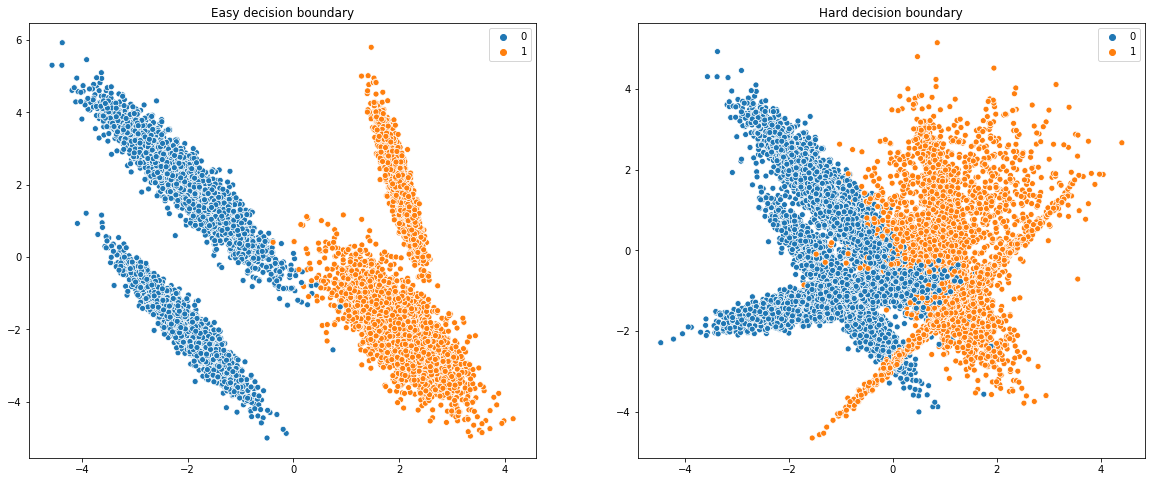

In [102]:
from sklearn.datasets import make_classification

# Easy decision boundary

X1,y1 = make_classification(n_samples=10000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=2,
                   flip_y=0,weights=[0.5,0.5], random_state=17)



f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X1[:,0],X1[:,1],hue=y1,ax=ax1);
ax1.set_title("Easy decision boundary");

# Hard decision boundary


X2,y2 = make_classification(n_samples=10000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1,
                   flip_y=0,weights=[0.7,0.3], random_state=17)



X2a,y2a = make_classification(n_samples=10000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1.25,
                   flip_y=0,weights=[0.8,0.2], random_state=93)


X2 = np.concatenate((X2,X2a))
y2 = np.concatenate((y2,y2a))

sns.scatterplot(X2[:,0],X2[:,1],hue=y2,ax=ax2);
ax2.set_title("Hard decision boundary");



X1,y1 = pd.DataFrame(X1),pd.Series(y1)
X2,y2 = pd.DataFrame(X2),pd.Series(y2)


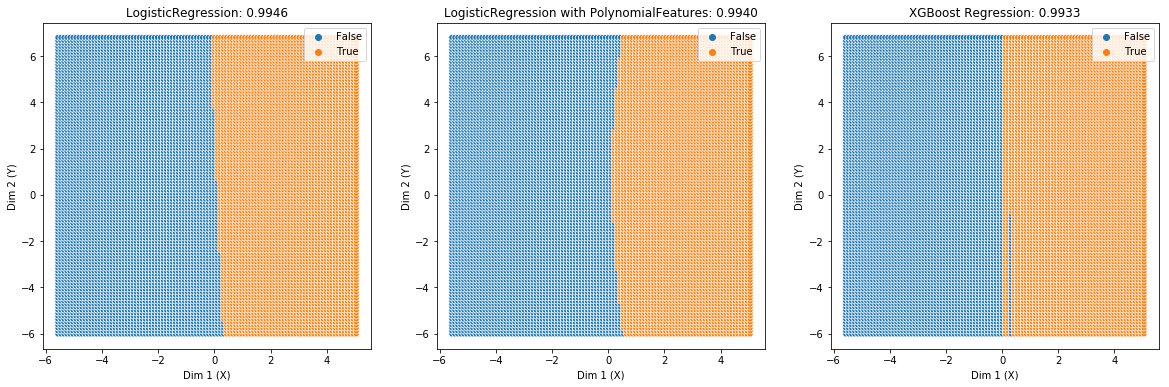

In [103]:
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,6))
lr_results = run_logistic_plain(X1,y1,ax1)

lrp_results = run_logistic_polynomial_features(X1,y1,ax2)

xgb_results = run_xgb(X1,y1,ax3)
plt.show()


Text(0.5, 1.0, 'Train scores')

Text(0.5, 1.0, 'Test scores')

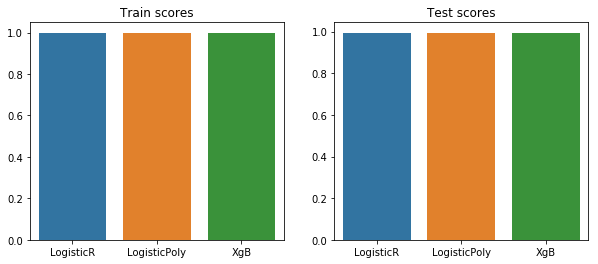

In [106]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
sns.barplot(x=["LogisticR","LogisticPoly","XgB"],
            y=[lr_results['balanced_accuracy_scorer'][0],lrp_results['balanced_accuracy_scorer'][0],xgb_results['balanced_accuracy_scorer'][0]],
           ax=ax1)
sns.barplot(x=["LogisticR","LogisticPoly","XgB"],
            y=[lr_results['balanced_accuracy_scorer'][1],lrp_results['balanced_accuracy_scorer'][1],xgb_results['balanced_accuracy_scorer'][1]],
           ax=ax2)
ax1.set_title("Train scores")
ax2.set_title("Test scores")

plt.show()

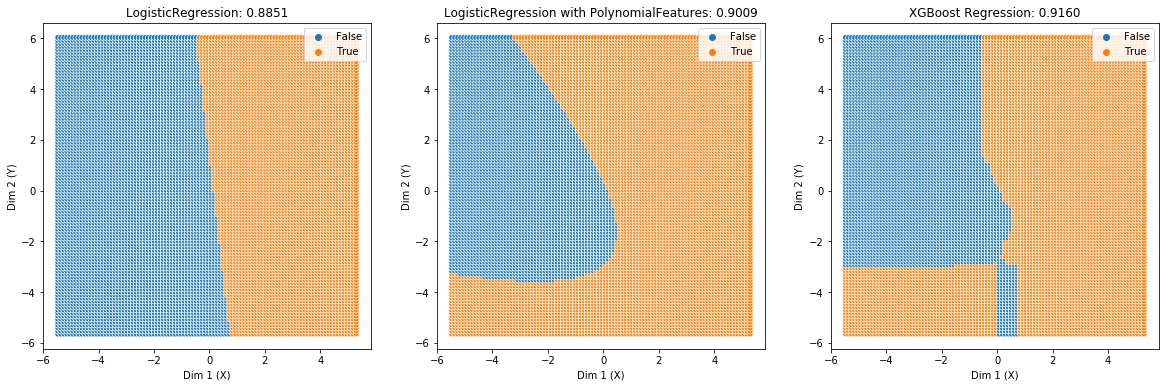

In [96]:
f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,6))
lr_results = run_logistic_plain(X2,y2,ax1)

lrp_results = run_logistic_polynomial_features(X2,y2,ax2)

xgb_results = run_xgb(X2,y2,ax3)
plt.show()

Text(0.5, 1.0, 'Train scores')

Text(0.5, 1.0, 'Test scores')

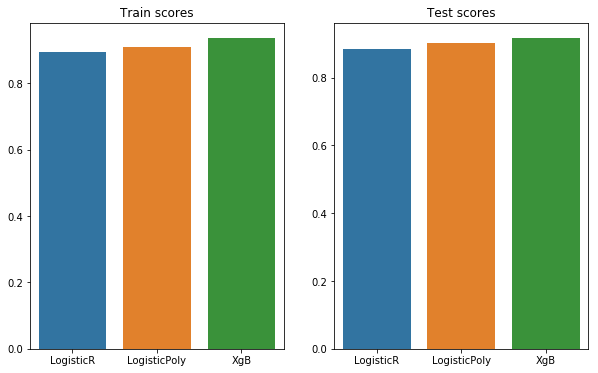

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
sns.barplot(x=["LogisticR","LogisticPoly","XgB"],
            y=[lr_results['balanced_accuracy_scorer'][0],lrp_results['balanced_accuracy_scorer'][0],xgb_results['balanced_accuracy_scorer'][0]],
           ax=ax1)
sns.barplot(x=["LogisticR","LogisticPoly","XgB"],
            y=[lr_results['balanced_accuracy_scorer'][1],lrp_results['balanced_accuracy_scorer'][1],xgb_results['balanced_accuracy_scorer'][1]],
           ax=ax2)
ax1.set_title("Train scores")
ax2.set_title("Test scores")
plt.show()

# Generating Data using our own Function

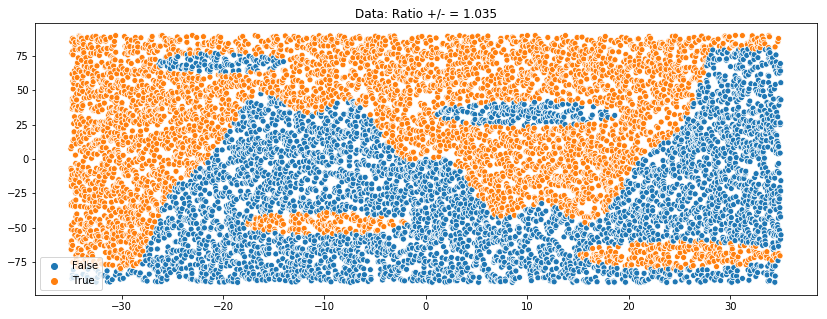

In [53]:
X,y = generate_data(10000,plot=True)